In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
#import renders as rs #need to install this lobrary
from IPython.display import display # Allows the use of display() for DataFrames
%matplotlib inline
sns.set_style('whitegrid')

In [103]:
# Load the wholesale customers dataset
data = pd.read_csv("Customer_data.csv")
data.drop(['Region', 'Channel'], axis = 1, inplace = True)
print("The Customers dataset has {} samples with {} features each.".format(*data.shape))
print()
print('Columns:')
display(data.columns)
display(data.head(5))

The Customers dataset has 440 samples with 6 features each.

Columns:


Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [104]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [105]:
#As we know Quartile 1 of Milk ends at value 1533, quartile 3 of Fresh ends at 16933.75,
# quartile 1 of grocery ends at 2153 and quartile 3 of Frozen ends at 3554.25 
display(data.query('Milk < 1533 and Fresh > 16933.75').head(5))
display(data.query('Grocery < 2153 and Fresh > 16933.75').head(5))
display(data.query('Grocery < 2153 and Frozen > 3554.25').head(5))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
32,21632,1318,2886,266,918,405
39,56159,555,902,10002,212,2916
54,27329,1449,1947,2436,204,1333
71,18291,1266,21042,5373,4173,14472
75,20398,1137,3,4407,3,975


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
39,56159,555,902,10002,212,2916
54,27329,1449,1947,2436,204,1333
75,20398,1137,3,4407,3,975
83,20874,1563,1783,2320,550,772
114,18044,1080,2000,2555,118,1266


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
39,56159,555,902,10002,212,2916
50,6269,1095,1980,3860,609,2162
75,20398,1137,3,4407,3,975
93,11314,3090,2062,35009,71,2698
99,9658,2182,1909,5639,215,323


In [106]:
""""
Lets take the following values as samples:
    1. Loc 39 as it shows very high fresh and very low milk
    2. Loc 75 as it shows high fresh and very low Grocery
    3. Loc 93 as it shows less Grocery and very high Frozen
"""

indices = [39, 75, 93]

sample_data = pd.DataFrame(data.loc[indices], columns = data.columns).reset_index(drop = True)
display(sample_data)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,56159,555,902,10002,212,2916
1,20398,1137,3,4407,3,975
2,11314,3090,2062,35009,71,2698


Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
Name: mean, dtype: float64

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,56159.000000,555.000000,902.000000,10002.000000,212.000000,2916.000000
1,20398.000000,1137.000000,3.000000,4407.000000,3.000000,975.000000
2,11314.000000,3090.000000,2062.000000,35009.000000,71.000000,2698.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455


Index([39, 75, 93, 'mean'], dtype='object')

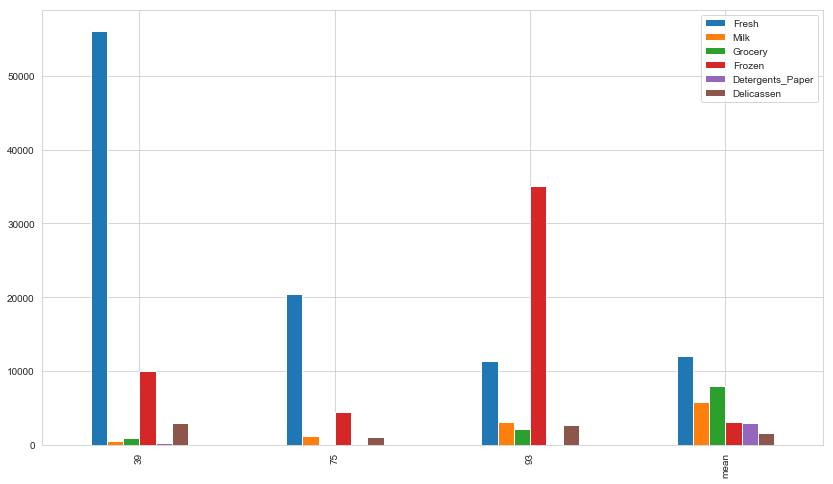

In [107]:
mean_data = data.describe().loc['mean', :]
display(mean_data)
samples_bar = sample_data.append(mean_data)
display(samples_bar)
samples_bar.index = indices + ['mean']
display(samples_bar.index)
display(samples_bar.plot(kind='bar', figsize=(14,8)))

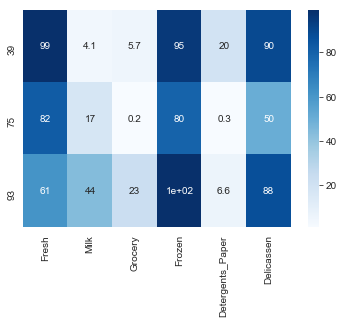

In [109]:
percentiles = data.rank(pct=True)
percentiles = 100*percentiles.round(decimals=3)
percentiles = percentiles.iloc[indices]
display(sns.heatmap(percentiles, vmin=1, vmax=99, annot=True, cmap='Blues'))

In [111]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [112]:
data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [113]:
# Create list to loop through
dep_vars = list(data.columns)


# Create loop to test each feature as a dependent variable
for var in dep_vars:
    
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([var], axis = 1)
    # Confirm drop
    # display(new_data.head(2))

    # Create feature Series (Vector)
    new_feature = pd.DataFrame(data.loc[:, var])
    # Confirm creation of new feature
    # display(new_feature.head(2))

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, new_feature, test_size=0.25, random_state=42)

    # TODO: Create a decision tree regressor and fit it to the training set
    # Instantiate
    dtr = DecisionTreeRegressor(random_state=42)
    # Fit
    dtr.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    # Returns R^2
    score = dtr.score(X_test, y_test)
    print('R2 score for {} as dependent variable: {}'.format(var, score))

R2 score for Fresh as dependent variable: -0.38574971020407384
R2 score for Milk as dependent variable: 0.15627539501732116
R2 score for Grocery as dependent variable: 0.6818840085440834
R2 score for Frozen as dependent variable: -0.21013589012491396
R2 score for Detergents_Paper as dependent variable: 0.27166698062685013
R2 score for Delicassen as dependent variable: -2.254711537203931


In [115]:
#pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
sns.scatt(data)

ValueError: Either both or neither of `x` and `y` must be specified (but try passing to `data`, which is more flexible).